# STUDENT PERFOMANCE INDICATOR 

1. Problem Statement
We want
* Type of problem:  
The problem relies on regression algorithm 
2. Data Collection


3. Used tools




In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk
plt.style.use('cyberpunk')


In [3]:
df = pd.read_csv('data/students.csv')

In [4]:
df.head()

,Unnamed: 0,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   1000 non-null   int64 
 1   gender                       1000 non-null   object
 2   race_ethnicity               1000 non-null   object
 3   parental_level_of_education  1000 non-null   object
 4   lunch                        1000 non-null   object
 5   test_preparation_course      1000 non-null   object
 6   math_score                   1000 non-null   int64 
 7   reading_score                1000 non-null   int64 
 8   writing_score                1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [20]:
df.describe(include='int')

,Unnamed: 0,math_score,reading_score,writing_score
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,499.500000,66.08900,69.169000,68.054000
std,288.819436,15.16308,14.600192,15.195657
min,0.000000,0.00000,17.000000,10.000000
25%,249.750000,57.00000,59.000000,57.750000
50%,499.500000,66.00000,70.000000,69.000000
75%,749.250000,77.00000,79.000000,79.000000
max,999.000000,100.00000,100.000000,100.000000


In [21]:
student_data = df.copy()

In [23]:
student_data = student_data.drop(columns='Unnamed: 0')

In [37]:
student_data.duplicated().sum(),student_data.isnull().sum()

(np.int64(0),
 gender                         0
 race_ethnicity                 0
 parental_level_of_education    0
 lunch                          0
 test_preparation_course        0
 math_score                     0
 reading_score                  0
 writing_score                  0
 dtype: int64)

In [39]:
columns = list(student_data.columns)

In [48]:
for i in columns:
    if student_data[i].dtype == 'object':
        print(f"[{i}] there are that unique values: {student_data[i].unique()} count: {len(student_data[i].unique())}")
    

[gender] there are that unique values: ['female' 'male'] count: 2
[race_ethnicity] there are that unique values: ['group B' 'group C' 'group A' 'group D' 'group E'] count: 5
[parental_level_of_education] there are that unique values: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] count: 6
[lunch] there are that unique values: ['standard' 'free/reduced'] count: 2
[test_preparation_course] there are that unique values: ['none' 'completed'] count: 2


<Axes: ylabel='Count'>

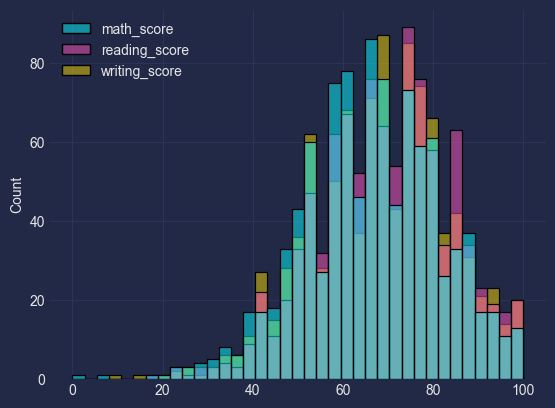

In [54]:
sns.histplot(student_data)

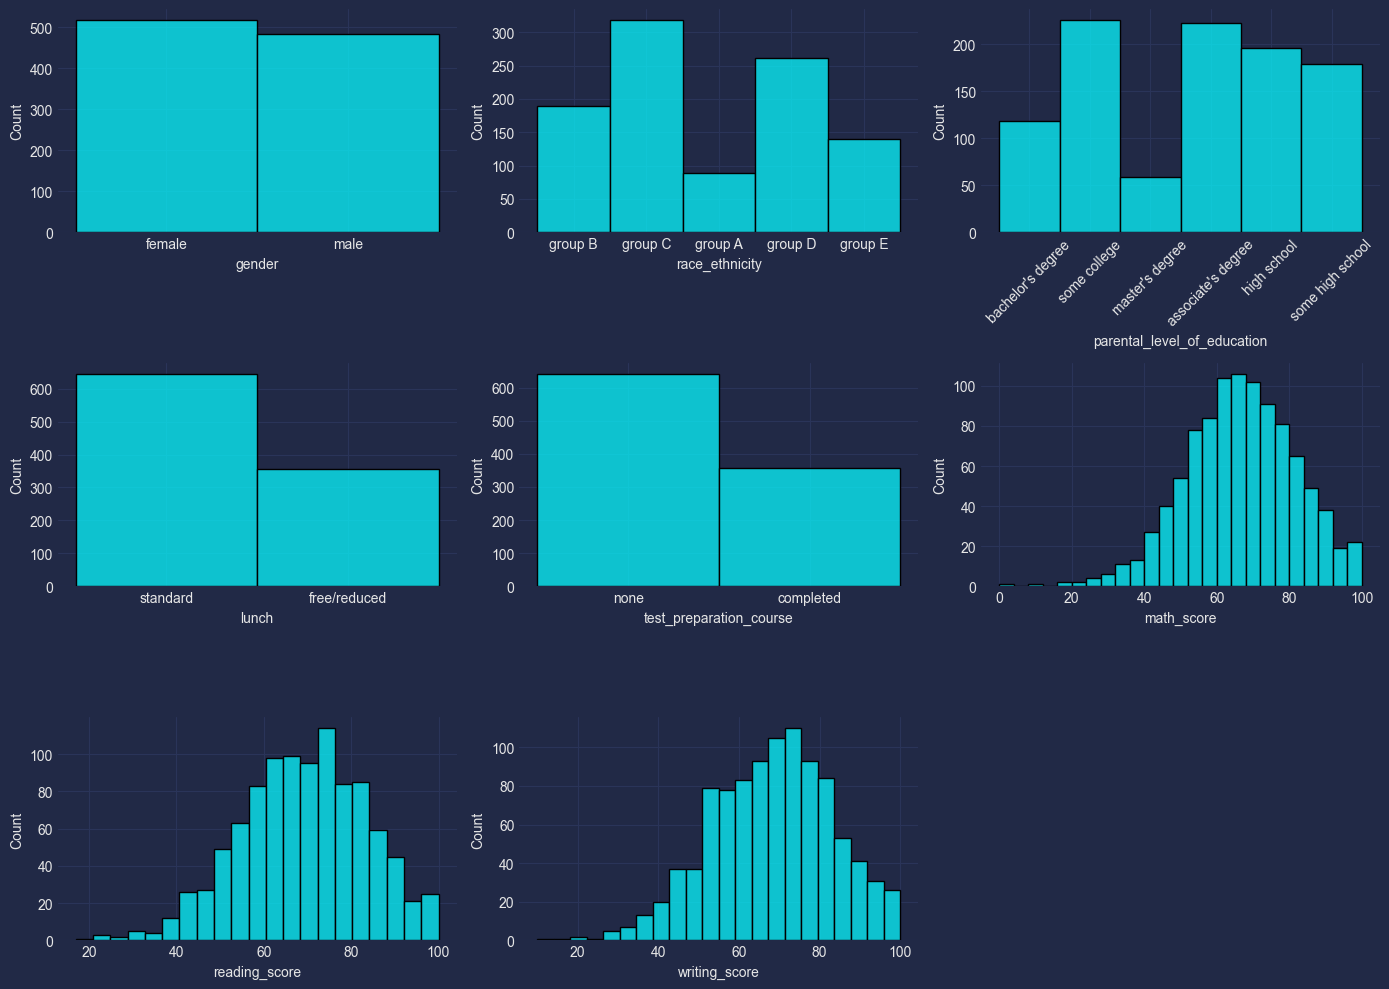

In [69]:
plt.figure(figsize=(14,10))

for keys,i in enumerate(columns):
    plt.subplot(3,3,keys+1)
    sns.histplot(df[i])
    if i == 'parental_level_of_education':  # Apply rotation for specific column
        plt.xticks(rotation=45)
    plt.tight_layout()

In [83]:
round(student_data[['math_score','reading_score','writing_score']].groupby(student_data['parental_level_of_education']).mean(),0)

,math_score,reading_score,writing_score
parental_level_of_education,,,
associate's degree,68.0,71.0,70.0
bachelor's degree,69.0,73.0,73.0
high school,62.0,65.0,62.0
master's degree,70.0,75.0,76.0
some college,67.0,69.0,69.0
some high school,63.0,67.0,65.0


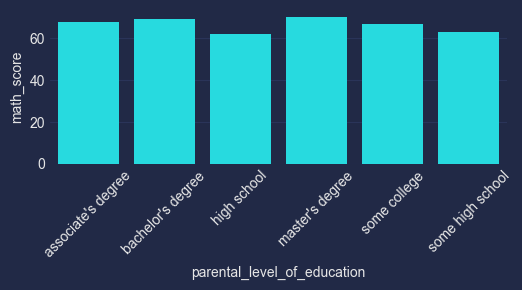

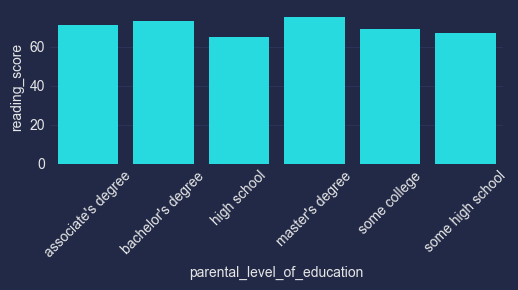

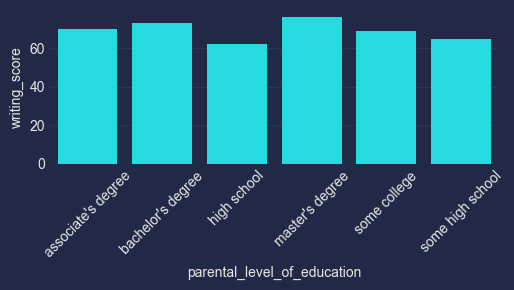

In [113]:
for keys,i in enumerate(['math_score','reading_score','writing_score']):
    plt.figure(figsize=(15,3))
    plt.subplot(1,3,keys+1)
    sns.barplot(round(student_data[i].groupby(student_data['parental_level_of_education']).mean(),0))
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()
 

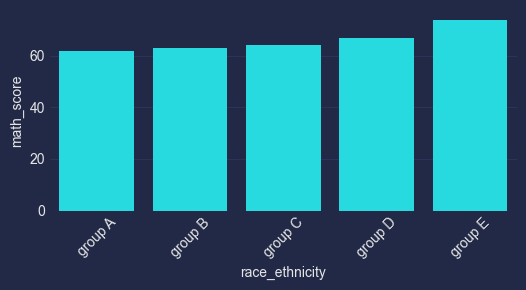

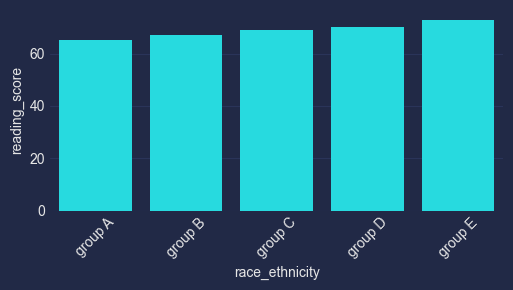

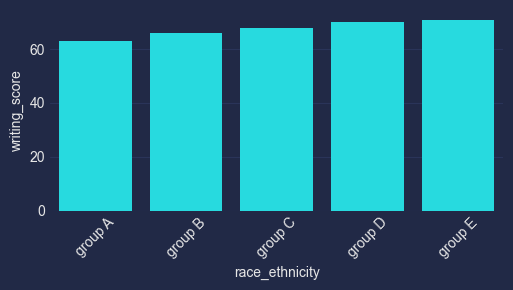

In [126]:

for keys,i in enumerate(['math_score','reading_score','writing_score']):
    plt.figure(figsize=(15,3))
    plt.subplot(1,3,keys+1)
    sns.barplot(round(student_data[i].groupby(student_data['race_ethnicity']).mean(),0))
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()

In [127]:
student_data['Total'] = student_data['math_score'] + student_data['writing_score'] + student_data['reading_score']

In [131]:
student_data['Average'] = round((student_data['math_score'] + student_data['writing_score'] + student_data['reading_score'])/3,0)

In [147]:
max_math = student_data[student_data['math_score'] == 100]
max_reading = student_data[student_data['reading_score'] == 100]
max_writing = student_data[student_data['writing_score'] == 100]
max_everywhere = student_data[(student_data['writing_score'] == 100) & (student_data['reading_score'] == 100) & (student_data['math_score'] == 100)]


print("Students with max number of scores on math : {}".format(len(max_math)))
print("Students with max number of scores on reading: {}".format(len(max_reading)))
print("Students with max number of scores on writing: {}".format(len(max_writing)))
print("Students with max number of scores on everything!! {}".format(len(max_everywhere)))

Students with max number of scores on math : 7
Students with max number of scores on reading: 17
Students with max number of scores on writing: 14
Students with max number of scores on everything!! 3


In [150]:
reading_less_20 = student_data[student_data['reading_score'] <= 20]['Average'].count()
writing_less_20 = student_data[student_data['writing_score'] <= 20]['Average'].count()
math_less_20 = student_data[student_data['math_score'] <= 20]['Average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1
